In [1]:
# Get pandas and postgres to work together
import psycopg2 as pg
import pandas as pd

# We are also going to do some basic viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import pickle
import numpy as np

In [2]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [3]:
with open('data/champion_df.pickle', 'rb') as f:
    df = pickle.load(f)

## Split data into train and test

In [4]:
len(df)

11406

In [5]:
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
df_train, df_test = train_test_split(df, test_size=.20, random_state=42)

In [7]:
X_train = df_train.iloc[:,7:-1]
y_train = df_train['category']
X_test = df_test.iloc[:,7:-1]
y_test = df_test['category']

In [8]:
len(df.columns)

56

In [9]:
X_train

,ate_less,low_cal_foods,ate_less_fat,exercise,skip_meals,'diet'_foods,liquid_diet,wt_loss_program,rx_diet_pills,non-rx_diet_pills,...,total_fat,sat_fat,mono_fat,poly_fat,cholesterol,vig_work_days,mod_work_days,walk_bike_days,vig_rec_days,mod_rec_days
6346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,139.11,37.220,42.781,47.864,349.0,0.0,4.0,0.0,0.0,0.0
9931,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.57,15.689,17.983,19.815,257.0,0.0,5.0,0.0,0.0,3.0
1360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.22,10.057,15.872,12.014,274.0,0.0,2.0,3.0,4.0,0.0
9781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.23,17.054,18.060,14.377,99.0,0.0,0.0,0.0,0.0,0.0
10947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.27,29.539,23.085,10.150,383.0,3.0,0.0,7.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.48,41.930,52.533,22.061,477.0,0.0,0.0,0.0,2.0,1.0
5191,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.38,14.739,18.209,15.610,415.0,0.0,0.0,3.0,3.0,1.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79.92,30.904,27.643,13.785,373.0,0.0,0.0,0.0,0.0,0.0
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,155.93,45.702,50.069,51.416,641.0,0.0,0.0,0.0,0.0,3.0


## Oversampling

In [10]:
import imblearn.over_sampling

# setup for the ratio argument of RandomOverSampler initialization
Obese = np.sum(y_train == 'Obese')
Average = np.sum(y_train == 'Average')
Fitness = np.sum(y_train == 'Fitness')
Athlete = np.sum(y_train == 'Athlete')
ratio = {'Obese': Obese, 'Average': Average*2, 'Fitness': Fitness*5, 'Athlete': Athlete*10} 


In [11]:
#initialize random sampler for later use
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'auto', random_state=42) 
SMOTE = imblearn.over_sampling.SMOTE(sampling_strategy = 'auto', random_state=42) 
ADASYN = imblearn.over_sampling.ADASYN(sampling_strategy = 'auto', random_state=42) 
# X_tr_rs, y_tr_rs = ROS.fit_resample(df_train,y_train)

## Functions (Model Selection Pipeline)
Things to address in pipeline:

Class Imbalance (sampling metrics)\
Kfold cross validation (small dataset) \
Modeling (parameter tuning, class weights for those it applies to) \
Metrics selected above (F1) \
ROC Curve

# Modeling

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from operator import itemgetter
from sklearn import tree
from sklearn.utils import check_random_state
import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from Sampling_CHAMP import SamplingGridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

In [144]:
dum = DummyClassifier(strategy='stratified')
dum_dum = dum.fit(X_train,y_train) 

In [145]:
dum_dum.predict_proba(X_test)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [146]:
metrics.precision_score(y_train, dum_dum.predict(X_train), average = 'macro', zero_division=0)
#note that micro will simply calculate true positives / (TP+FP), in multiclass this equals TP/all guesses = 74%
#macro will calculate TP/(TP+FP) for each class, then average across. In naive case, this is 74%*0.25 = 0.185 because obese is one of 4 classes 
#weighted this is 74%* 74% (precision for obese*obese percentage) + 0%*19% (percentage average) + 0*5%(percent fit) +0*2% (percent athlete) because obese is weighted

0.3315684937676571

In [16]:
import graphviz

In [147]:
f1_score(y_train, dum_dum.predict(X_train), average = 'macro', zero_division=0)

0.3351399890962345

In [148]:
train_class = classification_report(y_train, dum_dum.predict(X_train), target_names = ['Average','Fitness','Obese'], output_dict = True, zero_division=0)

In [149]:
train_class

{'Average': {'precision': 0.18954593453009505,
  'recall': 0.18746736292428198,
  'f1-score': 0.18850091887634549,
  'support': 1915},
 'Fitness': {'precision': 0.04259259259259259,
  'recall': 0.04212454212454213,
  'f1-score': 0.0423572744014733,
  'support': 546},
 'Obese': {'precision': 0.726457399103139,
  'recall': 0.7294011706438541,
  'f1-score': 0.7279263086946752,
  'support': 6663},
 'accuracy': 0.5745287154756685,
 'macro avg': {'precision': 0.3195319754086089,
  'recall': 0.3196643585642261,
  'f1-score': 0.31959483399083133,
  'support': 9124},
 'weighted avg': {'precision': 0.5728432343714274,
  'recall': 0.5745287154756685,
  'f1-score': 0.5736825215151279,
  'support': 9124}}

In [20]:
y_train.value_counts()

Obese      6663
Average    1915
Fitness     546
Name: category, dtype: int64

In [21]:
y_train.count()

9124

In [22]:
np.array([[30,0,15,0],[0,1,-1,0],[2.5,0,5,0],[0,.0,-50,.5]])

array([[ 30. ,   0. ,  15. ,   0. ],
       [  0. ,   1. ,  -1. ,   0. ],
       [  2.5,   0. ,   5. ,   0. ],
       [  0. ,   0. , -50. ,   0.5]])

In [23]:
from datetime import datetime

In [24]:
X_train.columns

Index(['ate_less', 'low_cal_foods', 'ate_less_fat', 'exercise', 'skip_meals',
       ''diet'_foods', 'liquid_diet', 'wt_loss_program', 'rx_diet_pills',
       'non-rx_diet_pills', 'lax_vomit', 'water', 'special_diet_wh',
       'low_carb_wh', 'smoke', 'fruit_veg_salad', 'change_eat_habits',
       'less_sugar', 'less_junk_fast', 'special_diet_dr', 'low_cal', 'low_fat',
       'low_salt', 'low_sugar', 'low_fiber', 'high_fiber', 'diabetic_diet',
       'bulking', 'low_carb_dr', 'high_protein', 'gluten_free', 'renal_kidney',
       'other_diet', 'kcal', 'protein', 'carbs', 'sugar', 'fiber', 'total_fat',
       'sat_fat', 'mono_fat', 'poly_fat', 'cholesterol', 'vig_work_days',
       'mod_work_days', 'walk_bike_days', 'vig_rec_days', 'mod_rec_days'],
      dtype='object')

In [25]:
features_wh = ['try_to_lose', 'ate_less', 'low_cal_foods', 'ate_less_fat', 'exercise',
       'skip_meals', "'diet'_foods", 'liquid_diet', 'wt_loss_program',
       'rx_diet_pills', 'non-rx_diet_pills', 'lax_vomit', 'water',
       'special_diet_wh', 'low_carb_wh', 'smoke', 'fruit_veg_salad',
       'change_eat_habits', 'less_sugar', 'less_junk_fast',]
features_dr = ['special_diet_dr',
       'low_cal', 'low_fat', 'low_salt', 'low_sugar', 'low_fiber',
       'high_fiber', 'diabetic_diet', 'bulking', 'low_carb_dr', 'high_protein',
       'gluten_free', 'renal_kidney', 'other_diet']
features_paq = ['vig_work_days',
       'mod_work_days', 'walk_bike_days', 'vig_rec_days', 'mod_rec_days']
features_1 = ['exercise','water','ate_less','special_diet_dr','bulking','low_cal','high_protein',
              'low_carb_dr', 'vig_work_days','mod_work_days', 'walk_bike_days', 'vig_rec_days', 'mod_rec_days']
features_diet = ['try_to_lose','water','ate_less','special_diet_dr','bulking','low_cal','high_protein',
              'low_carb_dr']
features_exercise = ['exercise','vig_work_days','mod_work_days', 'walk_bike_days', 'vig_rec_days', 'mod_rec_days']

### Run block with oversampling, features_1

In [26]:
X_train_1 = X_train[features_1]
binarizer = Binarizer()
X_train_1_bin = binarizer.transform(X_train_1)

print("Start Time =", datetime.now().strftime("%H:%M:%S"))

DTC_param_grid = {'max_depth':range(5,10), 'class_weight':[None,'balanced',{'Average':.3, 'Fitness':.6, 'Obese':.1}]}
DTC, DTC_score, DTC_params, DTC_scores_df, DTC_index, DTC_val_pred, DTC_val_true, DTC_val_pred_proba, DTC_train_scores, DTC_val_scores = \
SamplingGridSearchCV(ROS, DecisionTreeClassifier(), X_train_1, y_train, DTC_param_grid, folds=5)
print("DTC Done =", datetime.now().strftime("%H:%M:%S"))


Start Time = 01:55:05
DTC Done = 01:55:22


In [27]:
DTC, DTC_score, DTC_index

(DecisionTreeClassifier(class_weight='balanced', max_depth=6),
 0.24908988943630322,
 6)

In [28]:
DTC_scores_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parameters,"{'class_weight': None, 'max_depth': 5}","{'class_weight': None, 'max_depth': 6}","{'class_weight': None, 'max_depth': 7}","{'class_weight': None, 'max_depth': 8}","{'class_weight': None, 'max_depth': 9}","{'class_weight': 'balanced', 'max_depth': 5}","{'class_weight': 'balanced', 'max_depth': 6}","{'class_weight': 'balanced', 'max_depth': 7}","{'class_weight': 'balanced', 'max_depth': 8}","{'class_weight': 'balanced', 'max_depth': 9}","{'class_weight': {'Average': 0.3, 'Fitness': 0...","{'class_weight': {'Average': 0.3, 'Fitness': 0...","{'class_weight': {'Average': 0.3, 'Fitness': 0...","{'class_weight': {'Average': 0.3, 'Fitness': 0...","{'class_weight': {'Average': 0.3, 'Fitness': 0..."
train,0.0330432,0.0513718,0.0709399,0.114558,0.173861,0.254374,0.285283,0.266444,0.302127,0.299871,0.148323,0.255421,0.290131,0.318876,0.346162
val,0.0108436,0.0248753,0.0343658,0.0429446,0.0497826,0.223524,0.24909,0.217444,0.223894,0.206224,0.0984435,0.209015,0.191486,0.177558,0.181397


In [29]:
metrics.confusion_matrix(y_train,DTC.predict(X_train[features_1]))

array([[1104,  123,  688],
       [ 283,  149,  114],
       [1495,  228, 4940]])

In [30]:
metrics.confusion_matrix(y_test,DTC.predict(X_test[features_1]))

array([[ 207,   50,  195],
       [  75,   14,   35],
       [ 387,   88, 1231]])

In [31]:
DTC.feature_importances_

array([0.12793501, 0.04644911, 0.19587163, 0.02337057, 0.01535215,
       0.01834737, 0.01189462, 0.00741533, 0.07527148, 0.08278137,
       0.08800086, 0.22522822, 0.08208229])

In [32]:
### Run block with oversampling, all features

In [33]:
X_train = X_train
binarizer = Binarizer()

print("Start Time =", datetime.now().strftime("%H:%M:%S"))

DTC_param_grid = {'max_depth':range(5,10), 'class_weight':[None,'balanced',{'Average':.3, 'Fitness':.6, 'Obese':.1}]}
DTC, DTC_score, DTC_params, DTC_scores_df, DTC_index, DTC_val_pred, DTC_val_true, DTC_val_pred_proba, DTC_train_scores, DTC_val_scores = \
SamplingGridSearchCV(ROS, DecisionTreeClassifier(), X_train_1, y_train, DTC_param_grid, folds=5)
print("DTC Done =", datetime.now().strftime("%H:%M:%S"))


Start Time = 01:55:22
DTC Done = 01:55:42


In [34]:
DTC, DTC_score, DTC_index

(DecisionTreeClassifier(class_weight='balanced', max_depth=6),
 0.24908988943630322,
 6)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train_standard = scaler.fit_transform(X_train)

In [38]:
X_test_standard = scaler.transform(X_test)

In [58]:
LR_param_grid = {'class_weight':[None,'balanced',{'Average':.3, 'Fitness':.6, 'Obese':.1}],'solver':['lbfgs', 'liblinear','sag','saga']}

LR = LogisticRegression()
LR = LR.set_params(max_iter=300, n_jobs=-1)


LR, LR_score, LR_params, LR_scores_df, LR_index, LR_val_pred, LR_val_true, LR_val_pred_proba, LR_train_scores, LR_val_scores = \
SamplingGridSearchCV(ROS, LR, X_train_standard, y_train, LR_param_grid, folds=5)
print("LR done =", datetime.now().strftime("%H:%M:%S"))

/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does 

/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does 

LR done = 02:58:20


In [59]:
LR, LR_score, LR_params

(LogisticRegression(class_weight='balanced', max_iter=300, n_jobs=-1,
                    solver='liblinear'),
 0.2928639911631483,
 {'class_weight': 'balanced', 'solver': 'liblinear'})

In [60]:
LR_scores_df

,0,1,2,3,4,5,6,7,8,9,10,11
parameters,"{'class_weight': None, 'solver': 'lbfgs'}","{'class_weight': None, 'solver': 'liblinear'}","{'class_weight': None, 'solver': 'sag'}","{'class_weight': None, 'solver': 'saga'}","{'class_weight': 'balanced', 'solver': 'lbfgs'}","{'class_weight': 'balanced', 'solver': 'liblin...","{'class_weight': 'balanced', 'solver': 'sag'}","{'class_weight': 'balanced', 'solver': 'saga'}","{'class_weight': {'Average': 0.3, 'Fitness': 0...","{'class_weight': {'Average': 0.3, 'Fitness': 0...","{'class_weight': {'Average': 0.3, 'Fitness': 0...","{'class_weight': {'Average': 0.3, 'Fitness': 0..."
train,0.114945,0.0785028,0.111072,0.110403,0.274054,0.309834,0.274174,0.273891,0.2919,0.193131,0.28973,0.285755
val,0.101301,0.064699,0.103997,0.104109,0.259757,0.292864,0.257621,0.256156,0.264432,0.174885,0.26422,0.263802


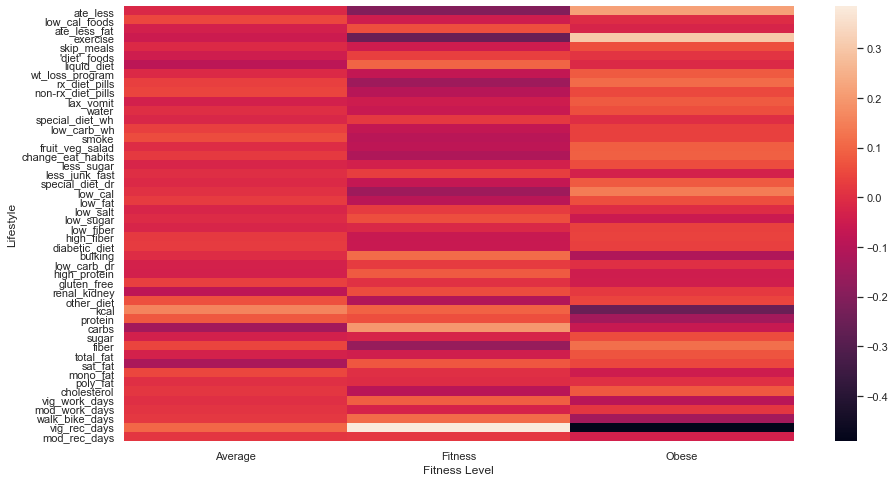

In [64]:
fig, ax = plt.subplots(figsize=(15,8))
x= sns.heatmap(LR.coef_.transpose(),yticklabels=X_train.columns,xticklabels=['Average','Fitness','Obese'])
x.set_xlabel("Fitness Level")
x.set_ylabel("Lifestyle",fontsize=12);

## Final Model

In [68]:
LR = LogisticRegression(max_iter=1000,class_weight='balanced',solver='liblinear')
Champ_model = LR.fit(X_train_standard,y_train)

In [143]:
Champ_model

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [135]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,Champ_model.predict(X_test_standard)))

In [141]:
cat_dict = {0:'Average',1:'Fitness',2:'Obese'}
conf_matrix = conf_matrix.rename(columns=cat_dict,index=cat_dict)

In [150]:
order = ['Obese','Average','Fitness']
conf_matrix = conf_matrix.reindex(index = order, columns=order)

In [151]:
conf_matrix

,Obese,Average,Fitness
Obese,1502,138,66
Average,275,108,69
Fitness,55,33,36


In [71]:
classification_report(y_test, Champ_model.predict(X_test_standard), target_names = ['Average','Fitness','Obese'], output_dict = True, zero_division=0)

{'Average': {'precision': 0.3870967741935484,
  'recall': 0.23893805309734514,
  'f1-score': 0.2954856361149111,
  'support': 452},
 'Fitness': {'precision': 0.21052631578947367,
  'recall': 0.2903225806451613,
  'f1-score': 0.24406779661016953,
  'support': 124},
 'Obese': {'precision': 0.8198689956331878,
  'recall': 0.88042203985932,
  'f1-score': 0.8490672696438666,
  'support': 1706},
 'accuracy': 0.7212971078001753,
 'macro avg': {'precision': 0.47249736187207,
  'recall': 0.46989422453394214,
  'f1-score': 0.46287356745631575,
  'support': 2282},
 'weighted avg': {'precision': 0.7010383486606473,
  'recall': 0.7212971078001753,
  'f1-score': 0.706543679367238,
  'support': 2282}}

In [119]:
coef_df = pd.DataFrame(Champ_model.coef_)
coef_df = coef_df.transpose()
coef_df = pd.concat([pd.Series(X_train.columns),coef_df],axis =1, ignore_index=True,sort=False)
coef_df = coef_df.rename(columns={0:"Lifestyle",1:'Average',2:'Fitness',3:'Obese'})
coef_df = coef_df.set_index('Lifestyle')

In [120]:
Champ_model.intercept_

array([-1.07185922, -1.87676644,  0.47288693])

In [156]:
coef_df = coef_df[['Obese','Average','Fitness']]

In [155]:
coef_df.sort_values('Fitness')

,Average,Fitness,Obese
Lifestyle,,,
total_fat,-1.260094,-2.596882,1.611571
rx_diet_pills,-0.073993,-0.573147,0.098430
exercise,-0.251639,-0.506196,0.372323
special_diet_dr,-0.058877,-0.380471,0.127531
ate_less,-0.231858,-0.366320,0.275719
smoke,0.018428,-0.355948,-0.007469
fiber,0.012158,-0.282907,0.075952
wt_loss_program,-0.106998,-0.193332,0.120529
high_fiber,-0.005363,-0.182893,0.020691


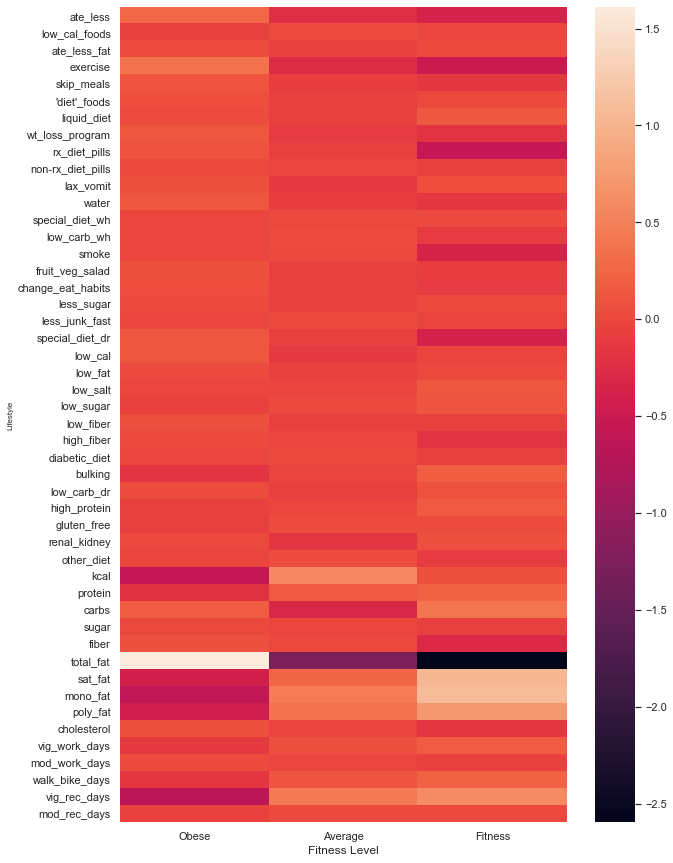

In [157]:
fig, ax = plt.subplots(figsize=(10,15))
x= sns.heatmap(coef_df)
x.set_xlabel("Fitness Level")
x.set_ylabel("Lifestyle",fontsize=8);

In [107]:
Champ_model.coef_

array([[-2.31858380e-01,  3.36162764e-02, -4.60286708e-02,
        -2.51639061e-01, -8.66506532e-02, -7.11272607e-02,
        -7.46676029e-02, -1.06998293e-01, -7.39926702e-02,
        -4.38306114e-04, -1.26966183e-01, -9.72826747e-02,
         3.80851005e-03,  3.53482208e-02,  1.84282545e-02,
        -5.36600470e-02, -4.54165661e-02, -3.57472351e-02,
         2.03040161e-02, -5.88766898e-02, -1.25991637e-01,
        -4.06071383e-02, -2.31176735e-02,  2.03207823e-02,
        -6.72209121e-02, -5.36326509e-03,  2.41672154e-03,
        -1.78424347e-02, -5.70516865e-02, -5.85821553e-03,
         4.95152777e-02, -1.62408116e-01,  3.65511797e-02,
         5.61937267e-01,  1.53103129e-01, -2.98509777e-01,
        -5.32607735e-03,  1.21580998e-02, -1.26009449e+00,
         2.61446418e-01,  4.61421948e-01,  3.56567152e-01,
        -2.73114848e-02,  7.69804677e-02, -5.07926485e-03,
         1.02742017e-01,  4.39515670e-01,  2.49915287e-02],
       [-3.66320329e-01, -7.00464835e-04,  3.03684691e-

In [123]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc

In [124]:
lb = LabelBinarizer()
lb.fit(['Average','Fitness','Obese'])

LabelBinarizer()

In [131]:
LR_train_bin = lb.transform(y_train)

In [132]:
LR_train_bin.shape

(9124, 3)

In [ ]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(4):
    precision[i], recall[i], _= metrics.precision_recall_curve(a[:,i],proba[:,i])
    average_precision[i] = average_precision_score(LR_val_bin[:, i], proba[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(LR_val_bin.ravel(),
    proba.ravel())
average_precision["micro"] = average_precision_score(LR_val_bin, proba,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

## Models run on "facts"

These use fewer features, sticking to just the "facts" such as nutrition intake, not including weight loss and diet survey responses that can be more biased

In [46]:
facts = ['kcal', 'protein', 'carbs',
       'sugar', 'fiber', 'total_fat', 'sat_fat', 'mono_fat', 'poly_fat',
       'cholesterol', 'vig_work_days', 'mod_work_days', 'walk_bike_days',
       'vig_rec_days', 'mod_rec_days']

In [47]:
X_train_facts = X_train[facts]
print("Start Time =", datetime.now().strftime("%H:%M:%S"))

DTC_param_grid = {'max_depth':range(5,10), 'class_weight':[None,'balanced',{'Average':.3, 'Fitness':.6, 'Obese':.1}]}
DTC_facts, DTC_score_facts, DTC_params_facts, DTC_scores_df_facts, DTC_index_facts, DTC_val_pred_facts, DTC_val_true_facts, DTC_val_pred_proba_facts, DTC_train_scores_facts, DTC_val_scores_facts = \
SamplingGridSearchCV(ROS, DecisionTreeClassifier(), X_train_facts, y_train, DTC_param_grid, folds=5)
print("DTC Done =", datetime.now().strftime("%H:%M:%S"))


Start Time = 01:57:58
DTC Done = 01:58:29


In [48]:
DTC, DTC_score, DTC_params

(DecisionTreeClassifier(class_weight={'Average': 0.3, 'Fitness': 0.6,
                                      'Obese': 0.1},
                        max_depth=5),
 0.1684561738405679,
 {'class_weight': {'Average': 0.3, 'Fitness': 0.6, 'Obese': 0.1},
  'max_depth': 5})

In [49]:
X_train_standard_facts = scaler.fit_transform(X_train[facts])
X_test_standard_facts = scaler.transform(X_test[facts])

LR_param_grid = {'class_weight':[None,'balanced',{'Average':.3, 'Fitness':.6, 'Obese':.1}],'solver':['lbfgs', 'liblinear','sag','saga']}

LR = LogisticRegression()
LR = LR.set_params(max_iter=300, n_jobs=-1)


LR_facts, LR_score_facts, LR_params_facts, LR_scores_df_facts, LR_index_facts, LR_val_pred_facts, LR_val_true_facts, LR_val_pred_proba_facts, LR_train_scores_facts, LR_val_scores_facts = \
SamplingGridSearchCV(ROS, LR, X_train_standard_facts, y_train, LR_param_grid, folds=5)
print("LR done =", datetime.now().strftime("%H:%M:%S"))

/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does 

/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does 

LR done = 01:59:46


In [50]:
LR, LR_score, LR_params

(LogisticRegression(class_weight='balanced', max_iter=300, n_jobs=-1,
                    solver='liblinear'),
 0.23458351166970695,
 {'class_weight': 'balanced', 'solver': 'liblinear'})